# CSE4/587 DATA-INTENSIVE COMPUTING SPRING 2018

# Twitter Application Development 

We will develop applications that are “data clients” for twitter data. Twitter supports many APIs, we will use Search API that is a part of the REST API

# DATA COLLECTION AND EXPLORATORY DATA ANALYSIS
---------------Meghana Vasudeva---------University at Buffalo---------------CSE587------------------------------------------

# The lab goals will be accomplished through these specific objectives:
1. Educate ourselves about influenza or flu that is rampant this season in the USA. In general, be cognizant of what is going on in world around you.
2. Familiarize ourselves with R language through Jupyter environment.
4. Exploring the real flu data, and conducting analysis performed by experts in Center for Disease Control (CDC) and related organizations.
5. Collected data by querying Twitter REST API. 
6. Processed data using twitteR library package of R.
7. Visualized geo spatial information extracted from the tweets using geo-map libraries of R: ggplot2, ggmap, maps,and maptools.
8. Compared CDC flu map with your own home-brewed flu map of the USA derived from the twitter data you obtained


In [ ]:

#This code was to get the tweets from Twitter with our authentication credentials. We use rtweet library for this purpose.

library(rtweet)
create_token(
  app = "Meghana_CSE_DIC",
  consumer_key = "5X1UGbcSIOL4UVZBCwz0QDExz  ",
  consumer_secret = "zIJFYt7vPjdxUXUaZ1bOjITD113uEQOzQ88W87zh2ZH49tayG0",
  access_token = "2648432046-f1SpAPzFj4cghNyoHObiy3X42kuSMyekpIWmFoz",
  access_secret = "uiHCHoQqb9EpPjSnPxnsEdEyRS4UgKZAGFRTArtxssWsH",
  set_renv = TRUE)

# Next 

tweets_Flu <- search_tweets(q="Flu OR flu OR #flu" , n = 18000, geocode = lookup_coords('usa'), lang = "en",include_rts = FALSE)
tweets.df <- as.data.frame(tweets)
tab <- table(tweets.df)
write.csv(tweets.df$location, "flutweets_flu_and_influenza.csv")


tweets_Influenza3 <- search_tweets(q= "avian OR influenza OR H1N1 OR cough OR cold OR seasonal flu OR bird flu OR #cough OR #cold" , n = 10000, geocode = lookup_coords('usa'), lang = "en",include_rts = FALSE, since = '2019-01-01')
tweets_fluinfuenza3.df <- as.data.frame(tweets_Influenza3)
tab <- table(tweets_fluinfuenza3.df)
write.csv(tweets_fluinfuenza3.df$location, "flutweets_influenza.csv")


In [ ]:
# in this part i have loaded the data and cleaned the data and used revgeo to get states except from longitude and latiude.


state <- read.csv(file.choose())
print(state)

state.ds <- as.matrix(state)

class(state.ds)

Conversion <- gsub('[^a-zA-Z0-9 ]',' ', state.ds)
locations_df <- geocode(Conversion)
write.csv(locations_df, "LatLon_Locations.csv")
loc = read.csv(file.choose())
print(loc)

install.packages("revgeo") #1-500
library("revgeo")
revgeo_df <- revgeo(longitude = loc$lon, latitude = loc$lat, output = 'frame')

write.csv(revgeo_df,"states1.csv")

library(revgeo)
loc1 = read.csv(file.choose()) #500-100
print(loc1)
revgeo_df1 <- revgeo(longitude = loc1$lon, latitude = loc1$lat, output = 'frame')
write.csv(revgeo_df1,"states1.csv")



loc2 = read.csv(file.choose()) #500-100
print(loc2)
revgeo_df2 <- revgeo(longitude = loc2$lon, latitude = loc2$lat, output = 'frame')
write.csv(revgeo_df2,"states2.csv")


loc3 = read.csv(file.choose())
print(loc3)
revgeo_df3 <- revgeo(longitude = loc3$lon, latitude = loc3$lat, output = 'frame')
write.csv(revgeo_df3,"states3.csv")



loc4 = read.csv(file.choose())
print(loc4)
revgeo_df4 <- revgeo(longitude = loc4$lon, latitude = loc4$lat, output = 'frame')
write.csv(revgeo_df4,"states4.csv")

library(revgeo)
loc5 = read.csv(file.choose())
print(loc5)
revgeo_df5 <- revgeo(longitude = loc5$lon, latitude = loc5$lat, output = 'frame')
print(revgeo_df5)
write.csv(revgeo_df5,"states5.csv")


loc6 = read.csv(file.choose()) #2500
print(loc6)
revgeo_df6 <- revgeo(longitude = loc6$lon, latitude = loc6$lat, output = 'frame')
print(revgeo_df6)
write.csv(revgeo_df6,"states6.csv")


loc7 = read.csv(file.choose()) #3000
print(loc7)
revgeo_df7 <- revgeo(longitude = loc7$lon, latitude = loc7$lat, output = 'frame')
print(revgeo_df7)
write.csv(revgeo_df7,"states7.csv")


loc8 = read.csv(file.choose()) #3500
print(loc8)
revgeo_df8 <- revgeo(longitude = loc8$lon, latitude = loc8$lat, output = 'frame')
print(revgeo_df8)
write.csv(revgeo_df8,"states8.csv")



loc9 = read.csv(file.choose()) #4500
print(loc9)
revgeo_df9 <- revgeo(longitude = loc9$lon, latitude = loc9$lat, output = 'frame')
print(revgeo_df9)
write.csv(revgeo_df9,"states9.csv")


loc10 = read.csv(file.choose()) #5000
print(loc10)
revgeo_df10<- revgeo(longitude = loc10$lon, latitude = loc10$lat, output = 'frame')
print(revgeo_df10)
write.csv(revgeo_df10,"states10.csv")


install.packages("rbind")
library("rbind")

full <- rbind(revgeo_df1,revgeo_df2,revgeo_df3,revgeo_df4,revgeo_df5,revgeo_df6,revgeo_df7,
              revgeo_df8,revgeo_df9,revgeo_df10)


write.csv(full,"final_states.csv")

tab <- table(full$state)
print(tab)

write.csv(tab,"states_freq.csv")


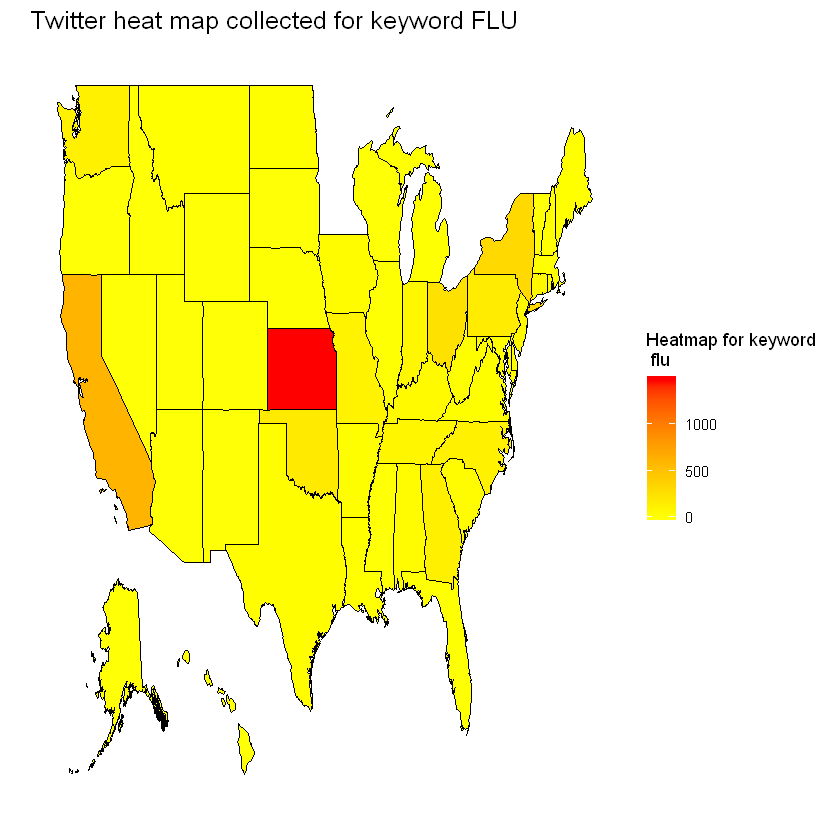

In [3]:
library(ggplot2)
library(fiftystater)
heat<-read.csv(file.choose())
heat$Freq<-as.integer(gsub("[^0-9\\.]", "", heat$Freq))

ili <- data.frame(state = tolower(heat$Var1), heat$Freq)
library(ggmap)
# map_id creates the aesthetic mapping to the state name column in your data
ggplot(ili, aes(map_id = state)) + 
  # map points to the fifty_states shape data
  geom_map(aes(fill = heat$Freq),color="black", size=0.3, map = fifty_states) + 

  
  expand_limits(x = fifty_states$long, y = fifty_states$lat) +
  scale_x_continuous(breaks = NULL) + 
  scale_y_continuous(breaks = NULL) +
  labs(x = "", y = "") +
  theme(legend.position = "right", 
        panel.background = element_blank())+
  scale_fill_gradient2(name="Heatmap for keyword\n flu",
                       low="lightblue", mid="yellow", high="red", 
                       midpoint=5, limits=range(heat$Freq))+
  ggtitle("Twitter heat map collected for keyword FLU")+
  theme(plot.title = element_text(size=15))



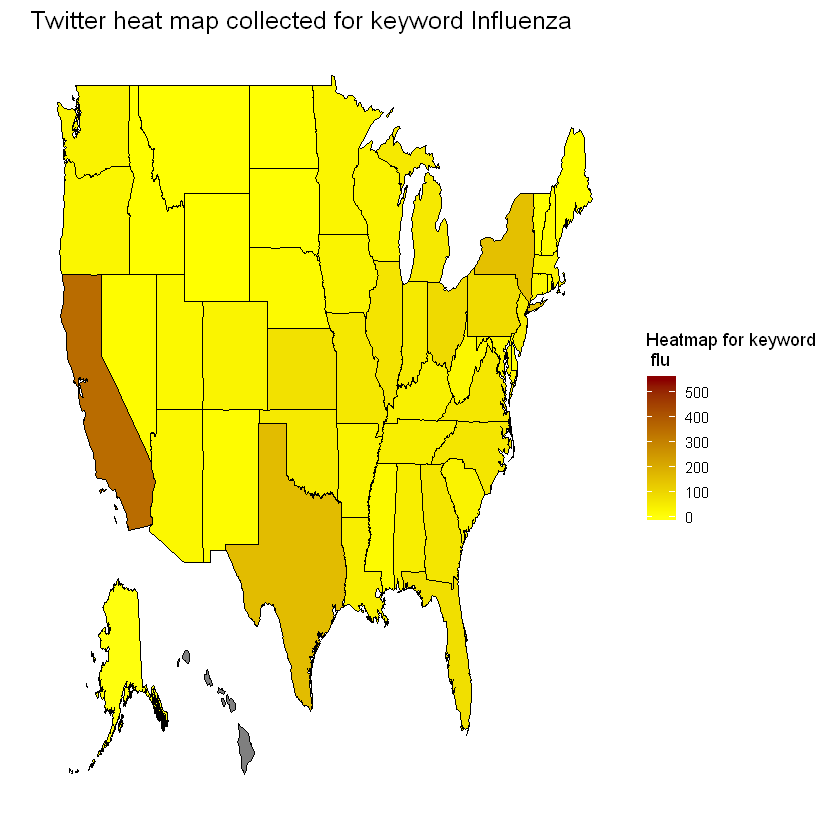

In [5]:
library(ggplot2)
library(fiftystater)
heat<-read.csv(file.choose())
heat$Freq<-as.integer(gsub("[^0-9\\.]", "", heat$Freq))
ili <- data.frame(state = tolower(heat$Var1), heat$Freq)
library(ggmap)
# map_id creates the aesthetic mapping to the state name column in your data
ggplot(ili, aes(map_id = state)) + 
  # map points to the fifty_states shape data
  geom_map(aes(fill = heat$Freq),color="black", size=0.3, map = fifty_states) + 

  
  expand_limits(x = fifty_states$long, y = fifty_states$lat) +
  scale_x_continuous(breaks = NULL) + 
  scale_y_continuous(breaks = NULL) +
  labs(x = "", y = "") +
  theme(legend.position = "right", 
        panel.background = element_blank())+
  scale_fill_gradient2(name="Heatmap for keyword\n flu",
                       low="lightblue", mid="yellow", high="darkred", 
                       midpoint=5, limits=range(heat$Freq))+
  ggtitle("Twitter heat map collected for keyword Influenza")+
  theme(plot.title = element_text(size=15))
